# Slow Resistor Capacitor Lab

In [32]:
from IPython.display import Markdown
from typing import Iterable, Tuple, Union, Any
import numpy as np
import pandas as pd
# Define our rules...

def rule_1(c, error_val):
    return abs(c) * error_val

# res = c * val ^ power, where error in value is error_val....
def rule_2(c, val, error_val, power):
    return abs(c * power * val ** (power - 1)) * error_val

def rule_3(*err_vals: Iterable[float]) -> float:
    """
    Calculate rule 3 from the paper 'Treatment of Data'.
    
    @param err_vals: A list of parameters, being the errors in each value. It is assumed they were summed 
                     together to get the final value.
    
    @returns: The error of all of the sum of the values...
    """
    total = 0
    
    for err in err_vals:
        total += err ** 2
    
    return np.sqrt(total)


def rule_4(value: float, *error_list: Iterable[Tuple[float, float, float]]) -> float:
    """
    Calculate rule 4 from the paper 'Treatment of Data'.
    
    @param value: The value of the thing we are trying to calculate the error of.
    @param error_list: A list of length 3 tuples. 
                       Each tuple should contain:
                       - A float: A value in the error formula.
                       - A float: The measured error in the above value.
                       - A float: The power of the above value in the multiplicative formula.

    @returns: A float, being the error in 'value'.
    """
    total = 0
    
    for x, x_err, power in error_list:
        total += (power * (x_err / x)) ** 2
        
    return abs(value) * np.sqrt(total)

FloatVec = Union[float, np.ndarray] 
BoolVec = Union[bool, np.ndarray]
OpVec = Union[Any, Iterable]
StrVec = Union[str, Iterable[str]]

def values_agree(val_1: FloatVec, err_1: FloatVec, val_2: FloatVec, err_2: FloatVec) -> BoolVec:
    """
    Determines if the values in 2 vectors(arrays) agree with each other, given there uncertainty values. 
    
    @param val_1: The 1st array of values.
    @param err_1: The uncertainty values for the 1st vector.
    @param val_2: The 2nd array of values.
    @param err_2: The uncertainty values for the 2st vector. 
    
    @returns: A vector of booleans, being whether each value agrees with the other.
    """
    # Grab the ranges for each value...
    r11, r12 = val_1 - err_1, val_1 + err_1
    r21, r22 = val_2 - err_2, val_2 + err_2
    
    # The ranges are sorted (r21 <= r22 and r11 <= r12), so the simple 2 checks below are enough. 
    # Check 1: Does r21(lowest value of 2nd range) land above the 1st range? If so fail...
    # Check 2: Does r22(highest value of 2nd range) fall below the 1st range? If so fail...
    return ((r21 <= r12) & (r11 <= r22))

# Some extra stuff for pretty printing measurements....
from IPython.display import Markdown

def format_result(msgs: OpVec, value: OpVec, value_error: OpVec, units: OpVec, past_dec: OpVec = 2) -> StrVec:
    all_arrs = [msgs, value, value_error, units, past_dec]
    
    def to_vec(val, types): 
        return [val] if(isinstance(val, types)) else list(val)
    
    (msgs, value, value_error, units, past_dec) = all_arrs = [
        to_vec(v, (float, int, str)) for v in all_arrs
    ]
    max_len = max(len(arr) for arr in all_arrs)
    
    msgs, value, value_error, units, past_dec = all_arrs = [
        (v * max_len if(len(v) == 1) else v) for v in all_arrs
    ]
    
    # Nesting variable in the formating of variables, not confusing at all....
    return [
        fr"{msg} $ {v:.0{pd}f} \pm {v_err:.0{pd}f} \text{{ }} {u} $"
        for msg, v, v_err, pd, u in zip(msgs, value, value_error, past_dec, units)
    ]

def display_result(*args, **kwargs):
    for res in format_result(*args, **kwargs):
        display(Markdown(res))

# Print function for markdown :)...
def mkdwn(string):
    display(Markdown(string))
    
def rmse(arr1, arr2):
    return np.sqrt(np.sum((arr1 - arr2) ** 2) / len(arr1))

## Part 1

,Time (s),Discharge (V),Charge (V)
0,0,6.04,0.00
1,10,4.40,2.09
2,20,2.98,3.50
3,30,1.99,4.24
4,40,1.37,4.89
5,50,0.91,5.27
6,60,0.62,5.52
7,70,0.42,5.70
8,80,0.27,5.81
9,90,0.19,5.89


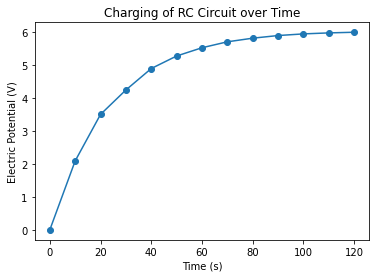

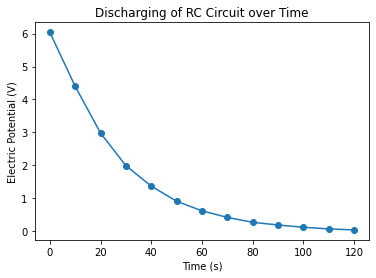

In [44]:
import matplotlib.pyplot as plt
from IPython.display import Latex

def build_plot(title, x_label, y_label) -> tuple:
    fig = plt.figure()
    ax = fig.gca()
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    return fig, ax
    

data = pd.read_csv("RCPart1.csv")

display(data)

fig, ax = build_plot("Charging of RC Circuit over Time", "Time (s)", "Electric Potential (V)")
ax.plot(data["Time (s)"], data["Charge (V)"], "o-", label = "Experimental")
ax.plot()

fig2, ax2 = build_plot("Discharging of RC Circuit over Time", "Time (s)", "Electric Potential (V)")
ax2.plot(data["Time (s)"], data["Discharge (V)"], "o-", label = "Experimental")

## Part 2

In [55]:
p2data = pd.read_csv("RCPart2.csv")
display(p2data)

TauC_all = p2data["Charge Time (s)"]
TauC = np.mean(TauC_all)
err_TauC = np.std(TauC_all) / np.sqrt(TauC_all.size)
print(format_result(r"$\tau$ for Charging: ", TauC, err_TauC, "s"))

TauD_all = p2data["Discharge Time (s)"]
TauD = np.mean(TauD_all)
err_TauD = np.std(TauD_all) / np.sqrt(TauD_all.size)
display_result(r"$\tau$ for Discharging: ", TauD, err_TauD, "s")

,Trial,Charge Time (s),Discharge Time (s),Max Potential (V),Discharge Stop (V),Charge Stop (V)
0,1,25.75,26.07,6.1,2.2448,3.8552
1,2,25.79,25.69,6.1,2.2448,3.8552
2,3,25.98,26.01,6.1,2.2448,3.8552
3,4,26.27,25.94,6.1,2.2448,3.8552
4,5,25.83,25.78,6.1,2.2448,3.8552


['$\\tau$ for Charging:  $ 25.92 \\pm 0.08 \\text{ } s $']


$\tau$ for Discharging:  $ 25.90 \pm 0.06 \text{ } s $

## Part 3

In [35]:
C = 45 / 1e6  #microF -> F
err_C = 0.1 / 1e6 # Limit on read from multimeter.

R = 511 * 1000  # kOhm -> Ohm
err_R = 1 * 1000 # Due to limit on multimeter.

ETau = C * R
err_ETau = rule_4(ETau, (C, err_C, 1), (R, err_R, 1))

display_result(r"Theoretical $\tau$: ", ETau, err_ETau, "s")

Theoretical $\tau$:  $ 23.00 \pm 0.07 \text{ } s $

## Part 1 with Part 3 Data Added.

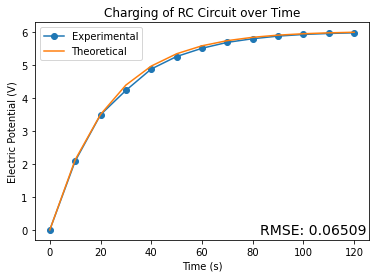

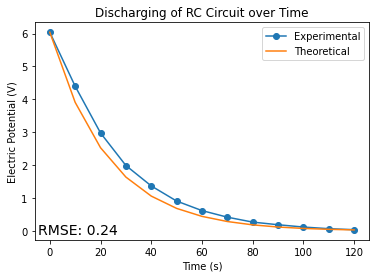

In [36]:
V0 = data["Discharge (V)"][0] # Our voltage init.

t_charge = V0 * (1 - np.exp(-data["Time (s)"] / (R * C)))

fig3, ax3 = build_plot("Charging of RC Circuit over Time", "Time (s)", "Electric Potential (V)")
ax3.plot(data["Time (s)"], data["Charge (V)"], "o-", label = "Experimental")
ax3.plot(data["Time (s)"], t_charge, label="Theoretical")
# Displaying the mean square error...
ax3.text(0.99, 0.01, f"RMSE: {rmse(data['Charge (V)'], t_charge):.05f}", size=14, va="bottom", ha="right", transform=ax3.transAxes)
ax3.legend()

t_discharge = V0 * (np.exp(-data["Time (s)"] / (R * C)))

fig4, ax4 = build_plot("Discharging of RC Circuit over Time", "Time (s)", "Electric Potential (V)")
ax4.plot(data["Time (s)"], data["Discharge (V)"], "o-", label = "Experimental")
ax4.plot(data["Time (s)"], t_discharge, label="Theoretical")
ax4.text(0.01, 0.01, f"RMSE: {rmse(data['Discharge (V)'], t_discharge):.02f}", size=14, va="bottom", ha="left", transform=ax4.transAxes)
ax4.legend()